In [1]:
# Para instalar qiskit en Colab:

#!pip install qiskit

##Primeros pasos en Qiskit

## Opcional: instalación local

Si deseas hacer una instalación local de qiskit:

1. Crea un ambiente virtual, esto no es obligatorio, pero muy recomendable. En esta página puedes ver la guía para hacerlo: https://docs.anaconda.com/anaconda/install/index.html

2. En el entorno virtual, instala qiskit en el ambiente creado, puedes usar directamente: pip install qiskit

## Qiskit

Qiskit es un *framework* para el cómputo cuántico desarrollado por IBM, que permite diseñar, *simular* y *ejecutar* algoritmos cuánticos.

## El modelo de circuito

En el **modelo de circuito** del cómputo cuántico, necesitamos de:

$\bullet$ Qubits (amplitudes de probabilidad o funciones de onda). Un qubit se puede representar como $|\psi\rangle = \alpha|e_0\rangle+\beta|e_1\rangle$, con $|\alpha|^2+|\beta|^2=1.$

$\bullet$ Compuertas (operadores unitarios). Algunos operadores importantes, que actúan sobre un qubit son los siguientes:

>$\star$ Operador de Hadamard: $\quad\hat H=\tfrac{1}{\sqrt{2}}\big(|0\rangle\langle0|+|0\rangle\langle1|+|1 \rangle\langle0|-|1\rangle\langle1|\big)$.  

>$\star$ Pauli-$z$: $\quad\hat z = |0\rangle\langle0|-|1\rangle\langle1|$

>$\star$ Pauli-$x$: $\quad\hat x = |0\rangle\langle1|+|1\rangle\langle0|$

>$\star$ Pauli-$y$: $\quad\hat y = -i|0\rangle\langle1|+i|1\rangle\langle0|$

$\bullet$ Mediciones.

$\bullet$ Un *backend*. Un backend es el recurso en el que simularemos o ejecturaremos el circuito. Un backend puede ser una computadora cuántica real o un simulador.

El backend tiene por objetivos:

$\bullet$ La ejecución del circuito.

$\bullet$ La optimización y *transpilación* de los mismos.

$\bullet$ La mitigación de errores.

## Nuestro primer circuito

In [2]:
# Creamos un qubit, llamado q

from qiskit import QuantumRegister
qr = QuantumRegister(1,'qr')    # el primer argumento indica cuántos qubits definimos
                                # el segundo argumento le da un nombre "humano" al qubit

In [3]:
# Creamos un bit (clásico)

from qiskit import ClassicalRegister
cr = ClassicalRegister(1,'cr')

In [4]:
# Creamos un circuito

from qiskit import QuantumCircuit
primer_circuito = QuantumCircuit(qr,cr)  # inicializamos el circuito con los qubits q

In [5]:
# Añadimos una compuerta Z al circuito

primer_circuito.z(qr[0])


In [6]:
# Agregamos una compuerta de medición

primer_circuito.measure(qr,cr)    # la medición del qubit qr se guarda en el bit cr

In [7]:
# Para tener una mejor versión del diagrama del circuito
#!pip install pylatexenc

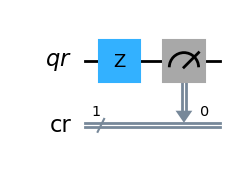

In [8]:
# Dibujamos el circuito
primer_circuito.draw('mpl')


El circuito anterior equivale a aplicar la operación

$|\psi\rangle = \hat Z|0\rangle = ¿?$

In [9]:
# Ejecutamos el circuito


# Seleccionamos un backend, en este caso, un simulador
!pip install qiskit-aer

from qiskit_aer import AerSimulator
backend =  AerSimulator(method='statevector')

# Ejecutamos la simulación. Es obligatorio dar el circuito a ejecutar

job = backend.run(primer_circuito,shots=100)   # elegimos el circuito,
                                               # y el número de repeticiones del experimento

resultados = job.result()
counts = resultados.get_counts()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 71.7 MB/s eta 0:00:00


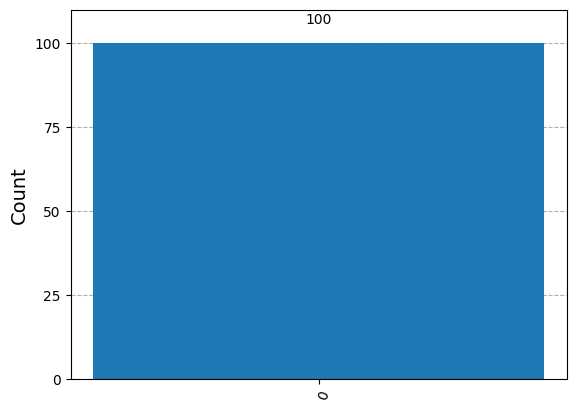

In [10]:
# Obtenemos un  histograma de las mediciones

from qiskit.visualization import plot_histogram

plot_histogram(counts)

## Un circuito un poco más interesante

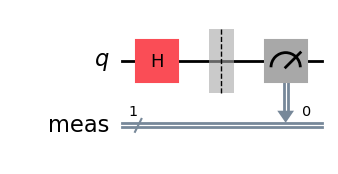

In [11]:
circuito_hadamard = QuantumCircuit(1)
circuito_hadamard.h(0)
circuito_hadamard.measure_all()
circuito_hadamard.draw('mpl')

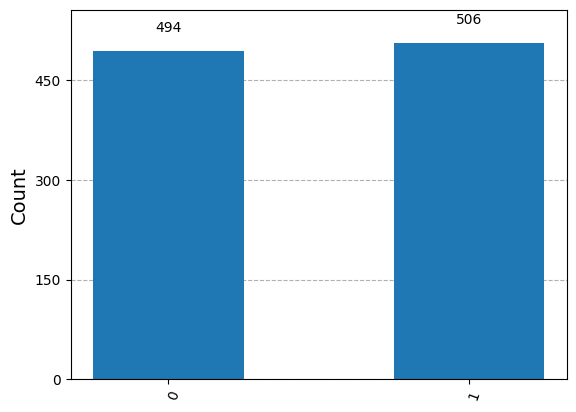

In [12]:
job = backend.run(circuito_hadamard,shots=1000)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

In [13]:
#Vamos a repetir el experimento, pero ahora inicializamos el qubit en otro estado
import numpy as np

estado_inicial = [1,1]
estado_inicial = estado_inicial/np.linalg.norm(estado_inicial)

# ¿Qué estado hemos preparado?

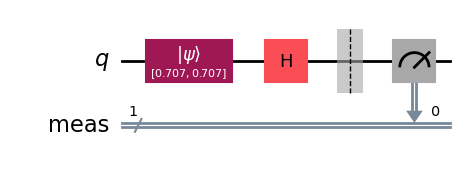

In [14]:
circuito_hadamard = QuantumCircuit(1)
circuito_hadamard.initialize(estado_inicial,0)    # el segundo argumento indica qué qubit inicializamos
circuito_hadamard.h(0)
circuito_hadamard.measure_all()
circuito_hadamard.draw('mpl')

# ¿Cuál será la salida de counts?

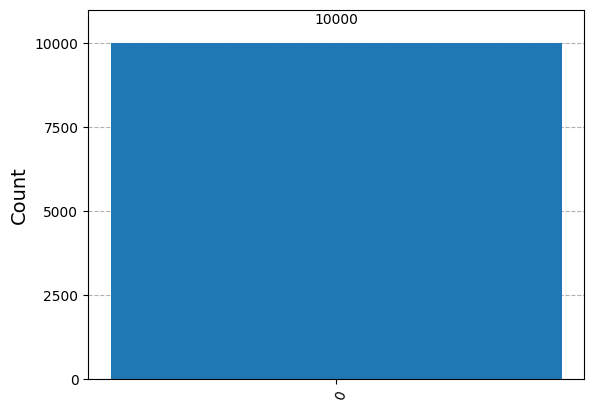

In [15]:
job = backend.run(circuito_hadamard,shots=10000)
resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

Podemos aplicar varias compuertas a un qubit, por ejemplo.

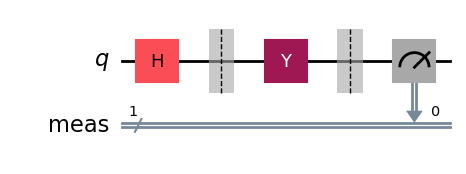

In [16]:
circuito_prueba = QuantumCircuit(1)
circuito_prueba.h(0)
circuito_prueba.barrier(0)            # ayuda visual
circuito_prueba.y(0)
circuito_prueba.measure_all()
circuito_prueba.draw('mpl')

El circuit anterior corresponde a la operación

$|\psi\rangle=\hat Y(\hat H|0\rangle) = ¿?$

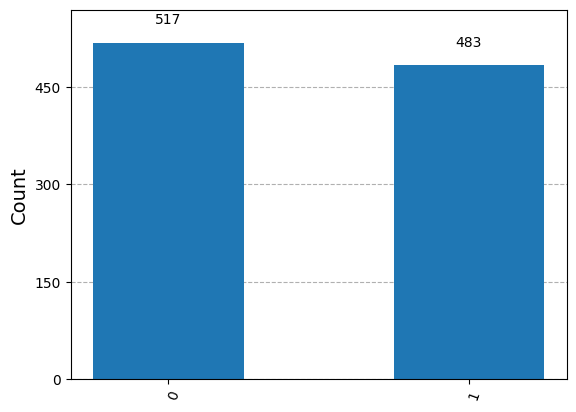

In [17]:
job = backend.run(circuito_prueba,shots=1000)   # elegimos el circuito,
                                               # y el número de repeticiones del experimento

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

### Ejercicios rápidos
  

#### Ejercicio 1


Usando las compuertas definidas en este documento, diseñe circuitos con un qubit, cuya salida sea:

(a) el estado $|1\rangle$,

(b) el estado $|+\rangle$,

(c) el estado $|-\rangle$    

#### Ejercicio 2

Considere el siguiente circuito:

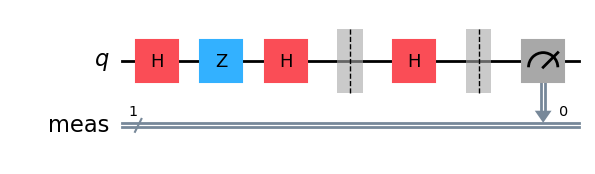

In [18]:
circuito2 = QuantumCircuit(1)

circuito2.h(0)
circuito2.z(0)
circuito2.h(0)

circuito2.barrier(0)

circuito2.h(0)

circuito2.measure_all()

circuito2.draw('mpl')

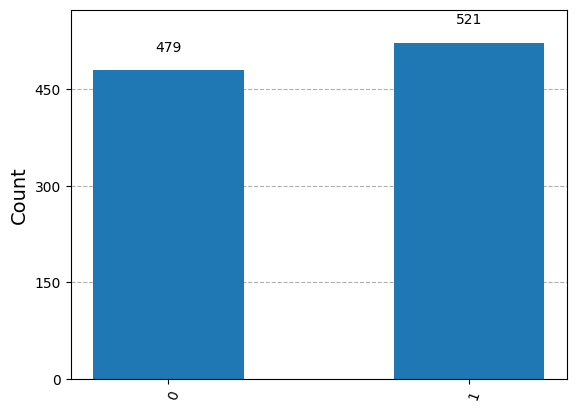

In [19]:
job = backend.run(circuito2,shots=1000)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

A partir del histograma, ¿puede determinar el estado final del sistema?

Si no es posible, ¿cómo podría solucionarlo?

## Mediciones en la base diagonal

Consideremos la siguiente modificación al circuito anterior:

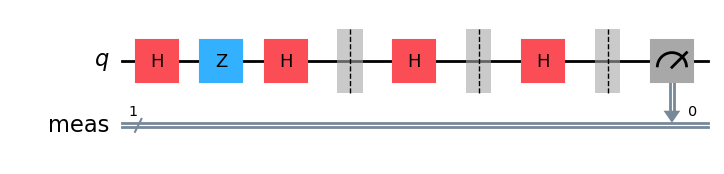

In [20]:
circuito2 = QuantumCircuit(1)

circuito2.h(0)
circuito2.z(0)
circuito2.h(0)

circuito2.barrier(0)

circuito2.h(0)

circuito2.barrier(0)

circuito2.h(0)

circuito2.measure_all()

circuito2.draw('mpl')

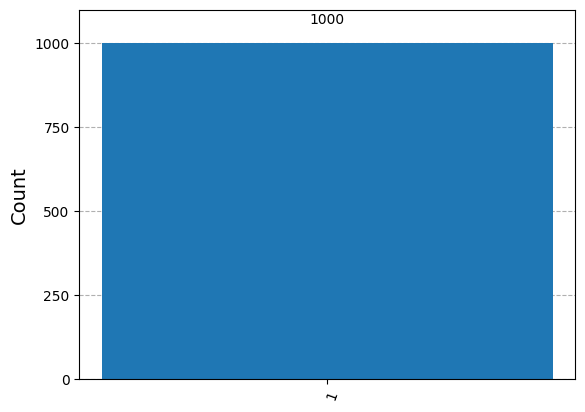

In [21]:
job = backend.run(circuito2,shots=1000)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

Para medir en la base diagonal, basta con aplicar una compuerta de Hadamard justo antes de medir, pues

$\hat H|+\rangle=$

y

$\hat H|-\rangle=$

## Dos qubits

**Convención de qiskit:** el bit más significativo (más a la izquierda) va hasta abajo al dibujar el circuito.

Lo anterior es válido para más qubits.

### Ejemplo 1

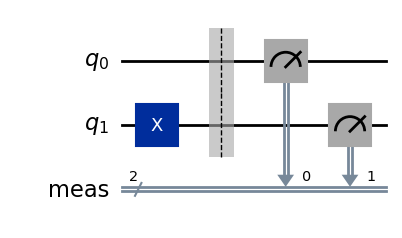

In [26]:
# Podemos aplicar compuertas a cada qubit por separado:

dos_qubits = QuantumCircuit(2)
dos_qubits.x(1)
dos_qubits.measure_all()
dos_qubits.draw('mpl')

# ¿Cuál es la salida del circuito?

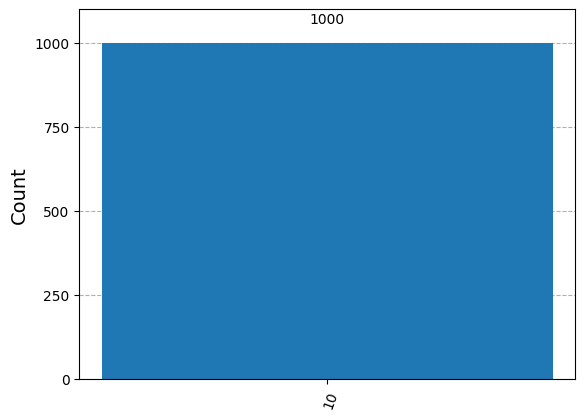

In [27]:
job = backend.run(dos_qubits,shots=1000)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

### Ejemplo 2

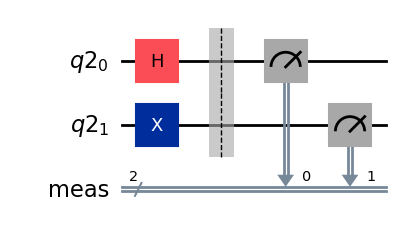

In [28]:
qr = QuantumRegister(2)
dos_qubits = QuantumCircuit(qr)
dos_qubits.h(0)
dos_qubits.x(1)
dos_qubits.measure_all()
dos_qubits.draw('mpl')

# ¿Cuál es la salida del circuito?

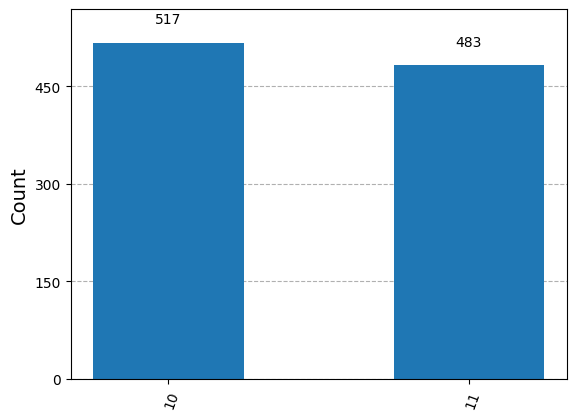

In [29]:
job = backend.run(dos_qubits,shots=1000)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

### Circuito de Bell

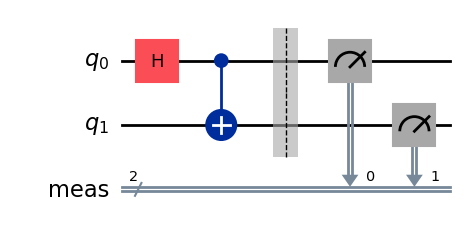

In [30]:
circuito_bell = QuantumCircuit(2)
circuito_bell.h(0)
circuito_bell.cx(0,1)                #cx: controlled x
circuito_bell.measure_all()

circuito_bell.draw('mpl')

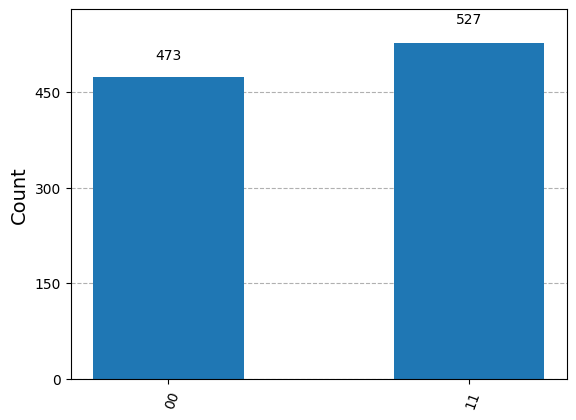

In [31]:
job = backend.run(circuito_bell,shots=1000)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

## Ejercicio 3:

Diseñe tres circuitos para generar los estados de Bell:

>(a) $|\Phi^-\rangle=\tfrac{1}{\sqrt{2}}(|00\rangle-|11\rangle)$

>(b) $|\Psi^+\rangle=\tfrac{1}{\sqrt{2}}(|01\rangle+|10\rangle)$

>(c) $|\Psi^-\rangle=\tfrac{1}{\sqrt{2}}(|01\rangle-|10\rangle)$